In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , LabelEncoder 
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier 
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from skimpy import skim
from sklearn.metrics import classification_report,confusion_matrix ,accuracy_score

In [549]:
df = pd.read_csv('winequality-red.csv')
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1124,6.5,0.580,0.00,2.2,0.096,3.0,13.0,0.99557,3.62,0.62,11.5,4
826,7.5,0.270,0.34,2.3,0.050,4.0,8.0,0.99510,3.40,0.64,11.0,7
928,8.6,0.470,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.80,11.2,5
971,10.4,0.260,0.48,1.9,0.066,6.0,10.0,0.99724,3.33,0.87,10.9,6
115,9.4,0.400,0.31,2.2,0.090,13.0,62.0,0.99660,3.07,0.63,10.5,6
783,6.5,0.460,0.14,2.4,0.114,9.0,37.0,0.99732,3.66,0.65,9.8,5
1184,6.7,0.640,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5
36,7.8,0.600,0.14,2.4,0.086,3.0,15.0,0.99750,3.42,0.60,10.8,6
1001,9.9,0.350,0.38,1.5,0.058,31.0,47.0,0.99676,3.26,0.82,10.6,7
526,7.3,0.365,0.49,2.5,0.088,39.0,106.0,0.99660,3.36,0.78,11.0,5


In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [551]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1599   │ │ float64     │ 11    │                                                          │
│ │ Number of columns │ 12     │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column               ┃ NA ┃ NA % ┃ mean    ┃ sd       ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ fixed acidity        │  0 │    0 │    8.32 │    1.741 │    4.6 │    7.1 │    7.9 │    9.2 │  15.9 │  ▁▇▃▂  │  │
│ │ volatile acidity     │  0 │    0 │  0.5278 │   0.1791 │   0.12 │   0.39 │   0.52 │   0.64 │  1.58 │  ▃▇▅▁  │  │
│ │ citric acid          │  0 │    0 │   0.271 │   0.1948 │      0 │   0.09 │   0.26 │   0.42 │     1 │  ▇▇▆▃  │  │
│ │ residual sugar       │  0 │    0 │   2.539 │     1.41 │    0.9 │    1.9 │    2.2 │    2.6 │  15.5 │   ▇▁   │  │
│ │ chlorides            │  0 │    0 │ 0.08747 │  0.04707 │  0.012 │   0.07 │  0.079 │   0.09 │ 0.611 │   ▇▁   │  │
│ │ free sulfur dioxide  │  0 │    0 │   15.87 │    10.46 │      1 │      7 │     14 │     21 │    72 │  ▇▆▃▁  │  │
│ │ total sulfur dioxide │  0 │    0 │   46.47 │     32.9 │      6 │     22 │     38 │     62 │   289 │  ▇▃▁   │  │
│ │ density              │  0 │    0 │  0.9967 │ 0.001887 │ 0.9901 │ 0.9956 │ 0.9968 │ 0.9978 │ 1.004 │  ▂▇▇▂  │  │
│ │ pH                   │  0 │    0 │   3.311 │   0.1544 │   2.74 │   3.21 │   3.31 │    3.4 │  4.01 │  ▂▇▅▁  │  │
│ │ sulphates            │  0 │    0 │  0.6581 │   0.1695 │   0.33 │   0.55 │   0.62 │   0.73 │     2 │  ▇▇▁   │  │
│ │ alcohol              │  0 │    0 │   10.42 │    1.066 │    8.4 │    9.5 │   10.2 │   11.1 │  14.9 │ ▃▇▅▂▁  │  │
│ │ quality              │  0 │    0 │   5.636 │   0.8076 │      3 │      5 │      6 │      6 │     8 │  ▁▇▇▂  │  │
│ └──────────────────────┴────┴──────┴─────────┴──────────┴────────┴────────┴────────┴────────┴───────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [552]:
df.duplicated().sum()

np.int64(240)

In [553]:
df.drop_duplicates(inplace=True)

In [554]:
df.duplicated().sum()

np.int64(0)

In [555]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [556]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [557]:
df.corr()["quality"]

fixed acidity           0.119024
volatile acidity       -0.395214
citric acid             0.228057
residual sugar          0.013640
chlorides              -0.130988
free sulfur dioxide    -0.050463
total sulfur dioxide   -0.177855
density                -0.184252
pH                     -0.055245
sulphates               0.248835
alcohol                 0.480343
quality                 1.000000
Name: quality, dtype: float64

In [558]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


C:\Users\User\AppData\Local\Temp\ipykernel_2860\2887852870.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quality", y=feature, data=df, palette="Set2", ax=axes[row, col])
C:\Users\User\AppData\Local\Temp\ipykernel_2860\2887852870.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quality", y=feature, data=df, palette="Set2", ax=axes[row, col])
C:\Users\User\AppData\Local\Temp\ipykernel_2860\2887852870.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quality", y=feature, data=df, palette="Set2", ax=axes[row, col])
C:\Users\U

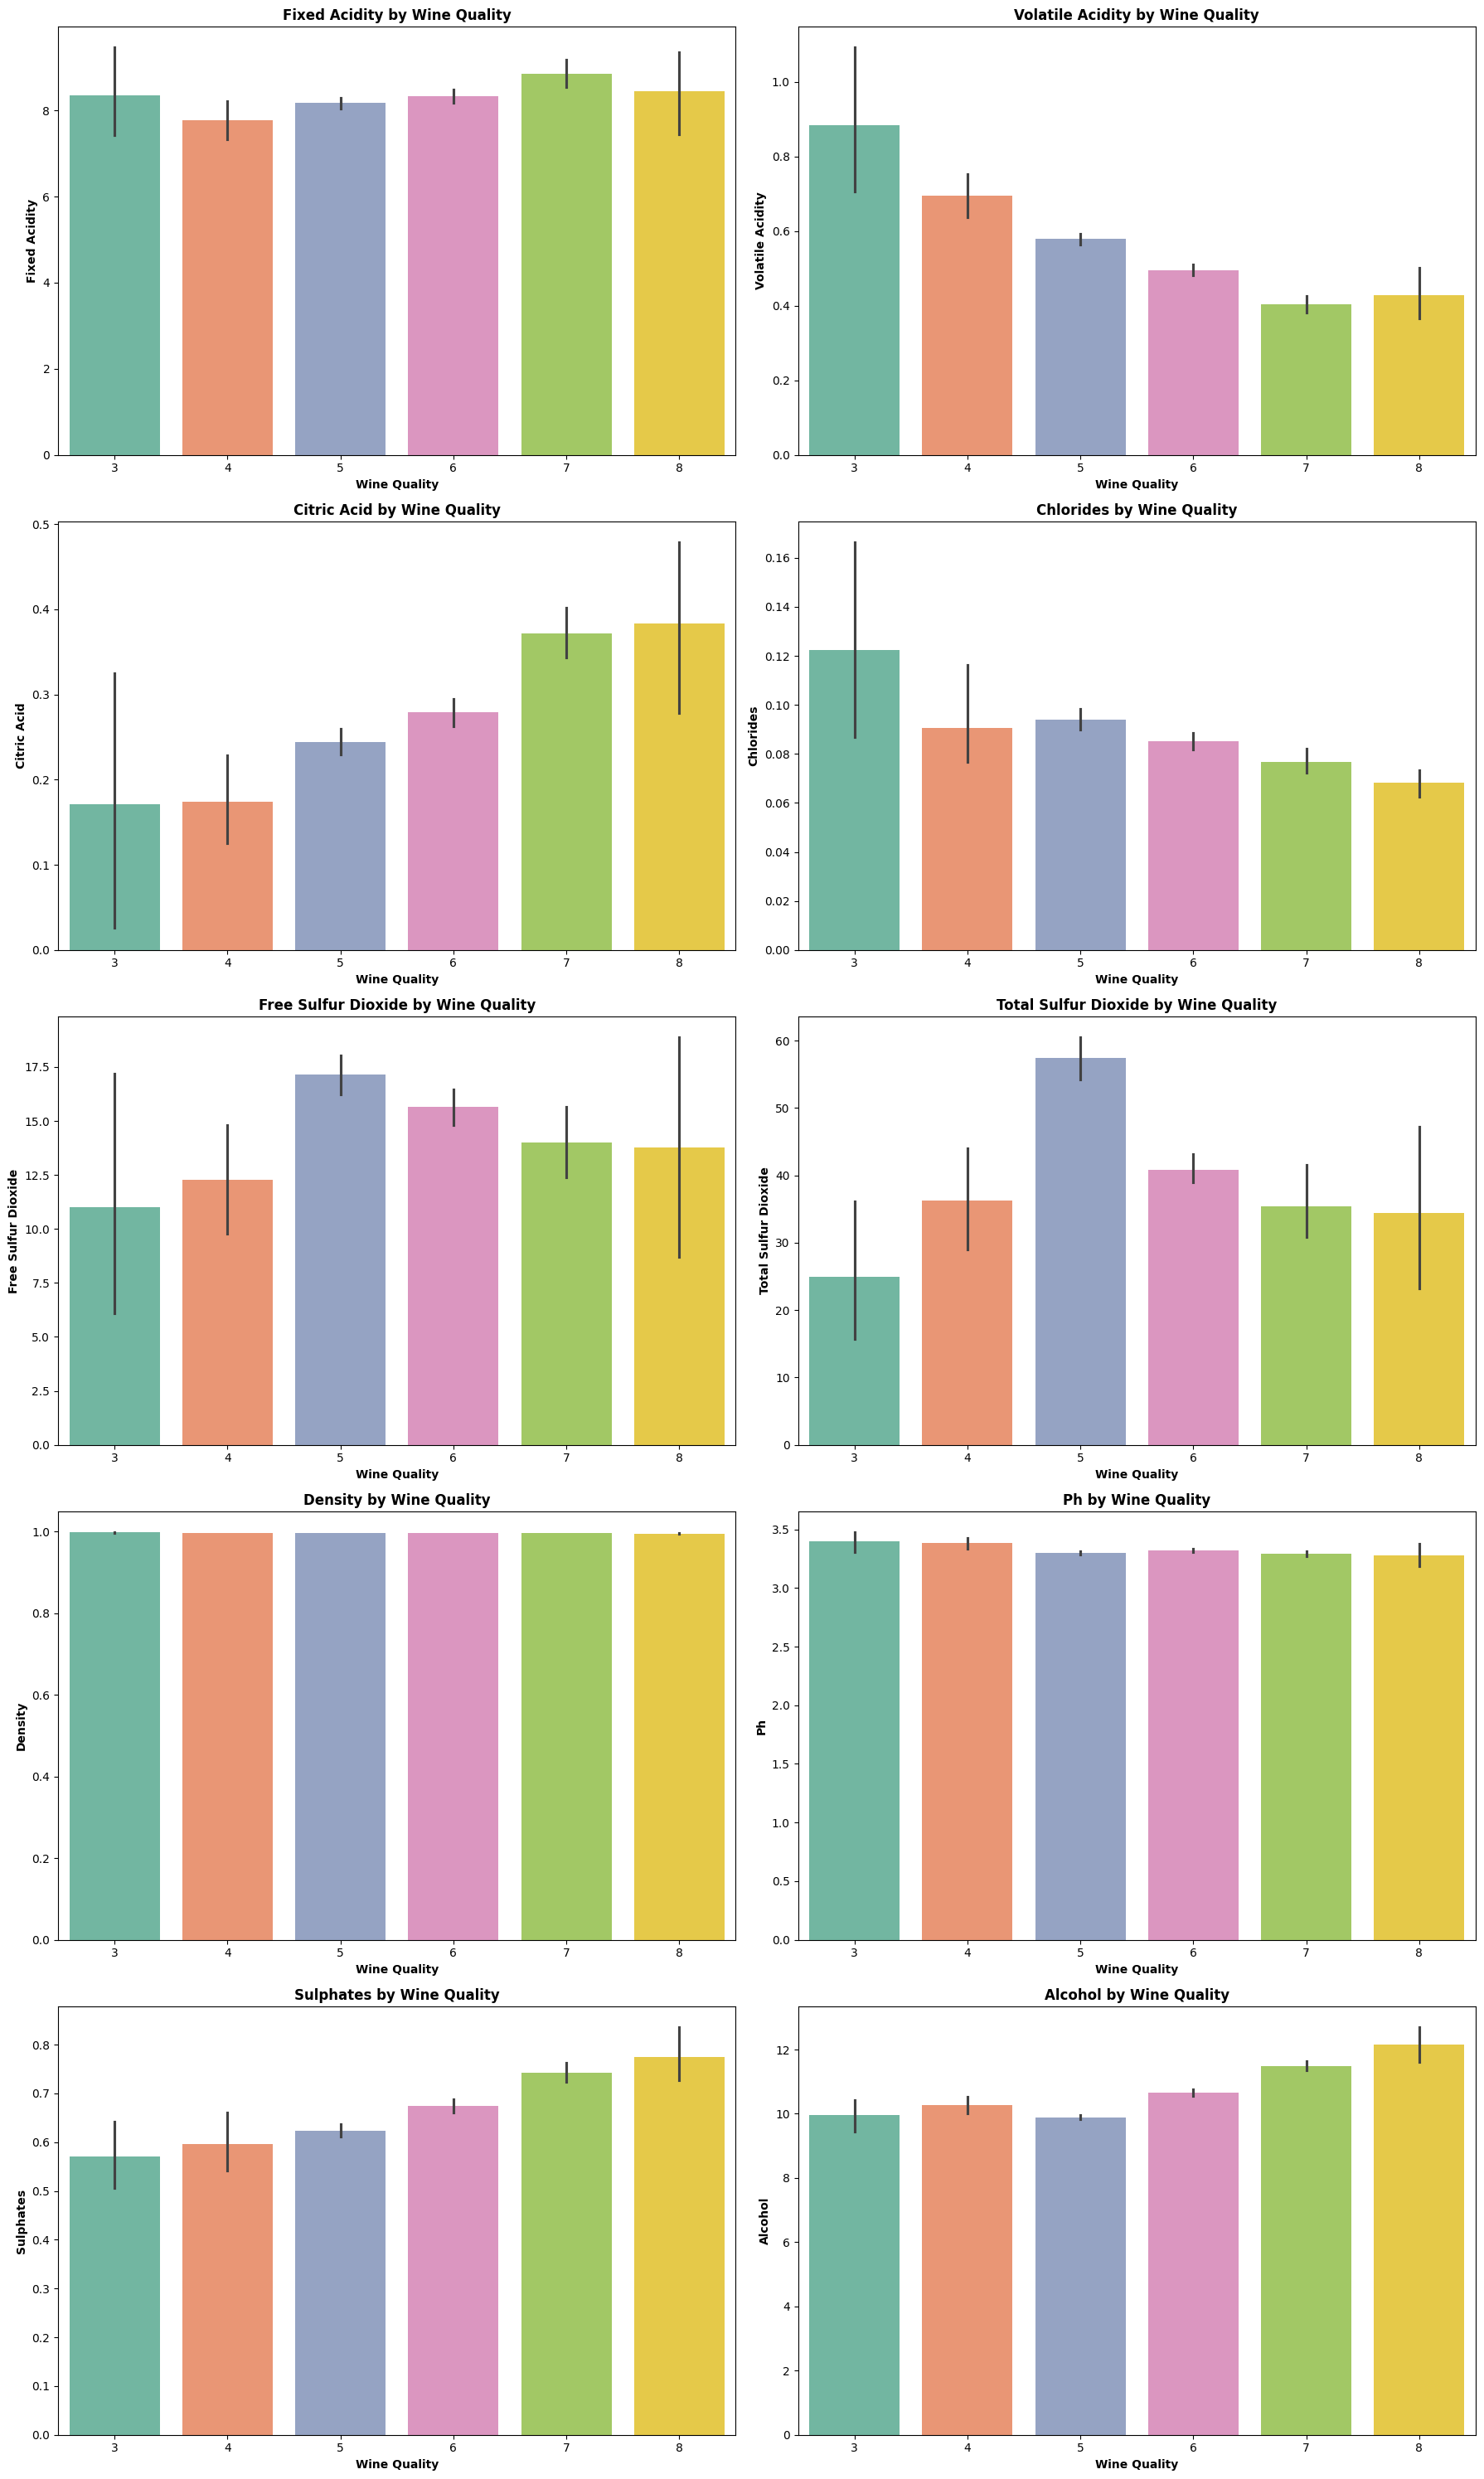

In [559]:
n_cols = 2
n_rows = int(np.ceil(len(features) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))

for idx, feature in enumerate(features):
    row, col = divmod(idx, n_cols)
    sns.barplot(x="quality", y=feature, data=df, palette="Set2", ax=axes[row, col])
    axes[row, col].set_xlabel("Wine Quality", weight='bold')
    axes[row, col].set_ylabel(feature.replace('_', ' ').title(), weight='bold')
    axes[row, col].set_title(f"{feature.replace('_', ' ').title()} by Wine Quality", weight='bold')

# Hide any unused subplots
for j in range(len(features), n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


In [560]:
cols_to_drop = ['pH', 'density', 'total sulfur dioxide', 'free sulfur dioxide', 'chlorides', 'volatile acidity']
df = df.drop(columns=cols_to_drop)

In [561]:
df['acid_sugar_ratio'] = df['fixed acidity'] / (df['residual sugar'] + 1e-5)
df['sulphates_alcohol_ratio'] = df['sulphates'] / (df['alcohol'] + 1e-5)
df['acid_alcohol_interaction'] = df['fixed acidity'] * df['alcohol']
df['alcohol_sq'] = df['alcohol'] ** 2
df['residual_sugar_sq'] = df['residual sugar'] ** 2
df['residual_sugar_log'] = np.log1p(df['residual sugar'])

In [562]:
df.corr()["quality"]

fixed acidity               0.119024
citric acid                 0.228057
residual sugar              0.013640
sulphates                   0.248835
alcohol                     0.480343
quality                     1.000000
acid_sugar_ratio            0.045604
sulphates_alcohol_ratio     0.054417
acid_alcohol_interaction    0.315821
alcohol_sq                  0.477202
residual_sugar_sq           0.003860
residual_sugar_log          0.020154
Name: quality, dtype: float64

In [563]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)
label_quality = LabelEncoder()
df['quality'] = label_quality.fit_transform(df['quality'])
df['quality'].value_counts()

quality
0    1175
1     184
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

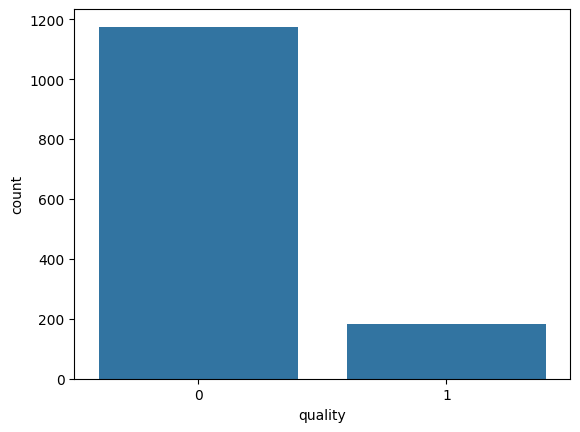

In [564]:
sns.barplot(df["quality"].value_counts())

In [565]:
X = df.drop(columns=["quality"],axis=1)
y = df["quality"]

In [566]:
X_train ,X_test ,y_train ,y_test = train_test_split(X ,y,test_size=0.2,random_state=42)

In [567]:
X_train.head()

,fixed acidity,citric acid,residual sugar,sulphates,alcohol,acid_sugar_ratio,sulphates_alcohol_ratio,acid_alcohol_interaction,alcohol_sq,residual_sugar_sq,residual_sugar_log
1016,8.9,0.40,2.2,0.75,12.6,4.045436,0.059524,112.14,158.76,4.84,1.163151
1519,6.6,0.08,2.6,0.58,10.2,2.538452,0.056863,67.32,104.04,6.76,1.280934
452,6.8,0.03,1.7,0.63,10.0,3.999976,0.063000,68.00,100.00,2.89,0.993252
847,7.4,0.16,1.8,0.70,9.9,4.111088,0.070707,73.26,98.01,3.24,1.029619
58,7.8,0.18,2.3,0.59,10.0,3.391290,0.059000,78.00,100.00,5.29,1.193922


In [568]:
y_train

1016    1
1519    0
452     0
847     0
58      0
       ..
1285    0
1329    0
1526    0
1011    0
1322    0
Name: quality, Length: 1087, dtype: int64

In [569]:
trf2 = ColumnTransformer([
    ("scaler",StandardScaler(),X.columns)
],remainder= 'passthrough')

In [600]:
trf3 = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=7,   # optional for extra imbalance handling
    random_state=42,
    max_depth=5,
    learning_rate=0.1,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1
)

In [601]:
pipe = Pipeline([
    ("trf2",trf2),
    ("smote",SMOTE(random_state=42)),
    ("trf3",trf3)
])

In [602]:
pipe.fit(X_train,y_train)

,steps,"[('trf2', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaler', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [603]:
y_pred = pipe.predict(X_test)

In [604]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8419117647058824

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.90       238
           1       0.43      0.79      0.56        34

    accuracy                           0.84       272
   macro avg       0.70      0.82      0.73       272
weighted avg       0.90      0.84      0.86       272


Confusion Matrix:
 [[202  36]
 [  7  27]]


In [605]:
from sklearn.model_selection import cross_val_score

roc_scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
print("ROC AUC scores for each fold:", roc_scores)
print("Mean ROC AUC score:", roc_scores.mean())

ROC AUC scores for each fold: [0.86049454 0.8466935  0.8546291  0.8093157  0.83817967]
Mean ROC AUC score: 0.8418625007986712


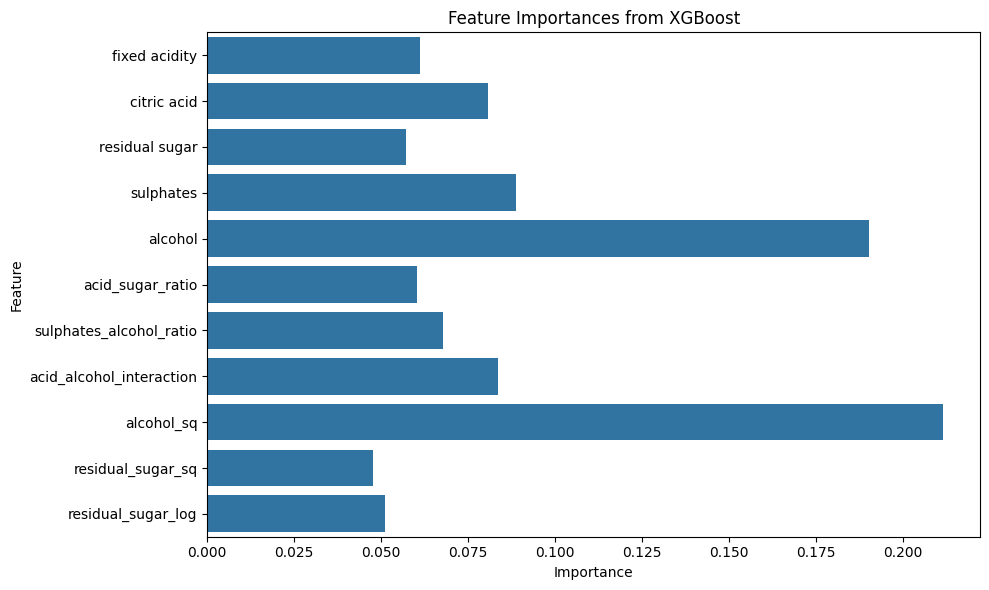

In [606]:
importances = pipe.named_steps['trf3'].feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, orient='h')
plt.title('Feature Importances from XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

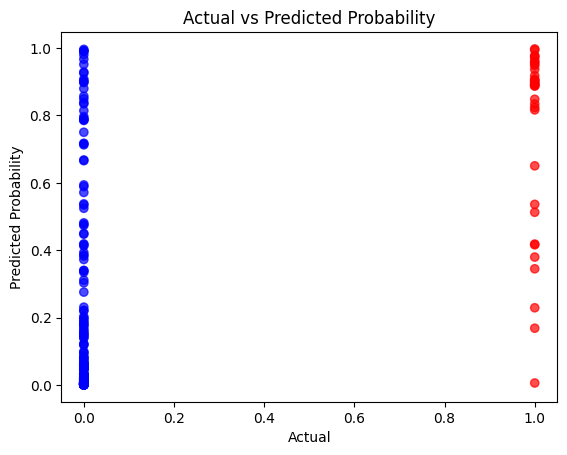

In [ ]:
y_prob = pipe.predict_proba(X_test)[:, 1]
plt.scatter(y_test, y_prob, c=y_test, cmap='bwr', alpha=0.7)
plt.xlabel("Actual")
plt.ylabel("Predicted Probability")
plt.title("Actual vs Predicted Probability")
plt.show()